In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, roc_auc_score, recall_score, balanced_accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

rand_state = 2023

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd+'/Task4.csv', index_col="Unnamed: 0")

# EDA

In [3]:
df

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149
0,1,-2.716667e+07,1.532973e+06,-1.382127e+07,2.829512e+06,1.689719e+07,-6.725783e+05,-5.512402e+06,6.158191e+06,7.882533e+05,...,0.067973,-0.567163,-1.771328,-2.177941,-3.480699,0.208771,-0.889729,-0.669585,0.579225,0.615956
1,0,-3.717327e+07,-1.254214e+07,-2.467823e+07,1.652219e+06,6.419720e+06,3.089595e+06,1.525981e+06,-1.549544e+05,-1.402395e+04,...,1.455616,-0.418064,-1.213405,0.076655,-0.385312,-0.795260,-1.041613,-1.009945,0.510847,0.082466
2,0,-3.766042e+07,-1.224612e+07,-2.413370e+07,7.697745e+05,7.279127e+06,3.904332e+06,1.568253e+06,-4.360454e+03,3.042621e+05,...,5.271981,-0.430013,0.754187,1.340762,3.892687,-2.510089,-2.013556,0.564031,-1.232687,0.181147
3,0,-3.822551e+07,-1.376055e+07,-2.434780e+07,3.935189e+06,3.161425e+06,4.321398e+05,2.836384e+05,4.994158e+05,8.386566e+04,...,-1.647516,0.584338,0.515600,0.389583,-0.653244,-0.116140,0.153417,0.955127,-0.198338,-0.130950
4,0,-3.884881e+07,-1.295881e+07,-2.331171e+07,5.057590e+06,-2.125657e+06,-7.725465e+06,-6.210829e+05,1.065965e+06,-2.885028e+04,...,-2.995177,2.369432,-0.639060,-0.417412,0.402714,-0.332974,-1.516252,-0.042774,0.452778,0.013317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,-3.796943e+07,-1.311893e+07,-2.336364e+07,6.328386e+06,-8.141701e+05,-4.822404e+06,9.807267e+05,2.497178e+06,5.194612e+05,...,1.661550,-0.553869,0.039459,0.070616,2.721049,-0.487955,-0.176672,-1.280571,1.943281,-0.521048
96,0,-2.900010e+07,-1.214939e+07,-1.907603e+07,2.145434e+06,1.233799e+06,-2.530339e+06,1.321344e+06,-1.748701e+06,6.429918e+05,...,1.424005,-3.533464,-2.512935,-0.588897,-4.298310,0.202045,0.269822,-0.356362,-0.387865,1.750643
97,0,-4.979869e+06,9.653447e+06,7.205349e+06,-2.392215e+07,9.967499e+05,3.419004e+06,-3.319537e+06,-5.908169e+06,1.762149e+06,...,-1.346766,-0.212824,-0.281256,0.392391,-0.179227,-1.562948,-0.047754,-0.207720,-0.639206,0.410049
98,0,-3.573344e+07,-1.019993e+07,-2.288350e+07,2.331780e+05,4.831580e+06,1.416916e+06,5.229008e+05,1.508941e+05,4.148051e+04,...,-1.205488,0.254134,0.789944,0.093784,-0.918745,-0.020926,-0.766883,1.260496,-0.135574,-1.025850


In [4]:
print("Число пропусков:", df.isna().sum().sum(),"\n", "Размер:", df.shape)
df.describe()

Число пропусков: 0 
 Размер: (100, 151)


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.120000,-2.633530e+07,-8.456748e+06,-1.540778e+07,1.901847e+06,1.790156e+06,1.317763e+05,1.245533e+06,4.274652e+05,4.321970e+05,...,0.592712,-0.453380,-0.174787,0.390727,-0.070046,-0.098904,0.318558,0.035393,0.315688,-0.459469
std,0.326599,1.313030e+07,6.406845e+06,1.114433e+07,7.021839e+06,9.602118e+06,1.012743e+07,5.478592e+06,3.201802e+06,2.673166e+06,...,3.051276,5.567694,2.119984,1.803118,2.112484,1.722379,1.540695,1.415760,1.388695,1.920210
min,0.000000,-3.956749e+07,-1.465029e+07,-2.585737e+07,-2.392215e+07,-5.420808e+07,-6.425594e+07,-1.487056e+07,-9.875758e+06,-1.499257e+07,...,-6.816786,-9.884200,-6.390179,-6.358286,-4.962381,-3.556512,-2.455711,-3.552189,-3.481513,-13.134550
25%,0.000000,-3.541903e+07,-1.298428e+07,-2.345646e+07,-7.744723e+05,6.449062e+05,-6.310401e+05,-6.204411e+05,-5.313466e+05,-2.663482e+05,...,-1.193454,-1.859200,-1.371743,-0.333295,-0.939080,-1.063622,-0.532187,-0.672491,-0.651997,-0.724266
50%,0.000000,-2.953332e+07,-1.078073e+07,-1.884442e+07,1.652945e+06,3.959806e+06,2.192607e+06,8.210785e+05,3.335404e+05,1.450563e+05,...,0.212494,-0.448076,-0.381315,0.321697,-0.173177,-0.184680,0.171069,0.159557,0.207484,-0.056812
75%,0.000000,-2.136343e+07,-7.058171e+06,-1.190931e+07,3.935189e+06,6.049792e+06,3.850430e+06,1.504209e+06,1.854896e+06,1.033298e+06,...,1.712838,0.640332,0.790146,0.816992,1.024825,0.551743,0.871991,0.749644,1.141516,0.410766
max,1.000000,3.603420e+07,1.511630e+07,3.519209e+07,3.450394e+07,1.731958e+07,9.275873e+06,2.780276e+07,1.684855e+07,8.970458e+06,...,9.768084,47.234279,7.286030,7.900562,5.353058,7.800713,8.379805,5.764217,4.753627,1.910233


In [5]:
# Все фитчи имеют не нулевой std, тип данных - числовой (нет дат)
selector = VarianceThreshold(threshold=0.0)
pd.DataFrame(columns = df.columns, data = selector.fit_transform(df)).shape

(100, 151)

In [6]:
# Присутствует явный дисбаланс классов - это необходимо учесть
df.target.value_counts()

0    88
1    12
Name: target, dtype: int64

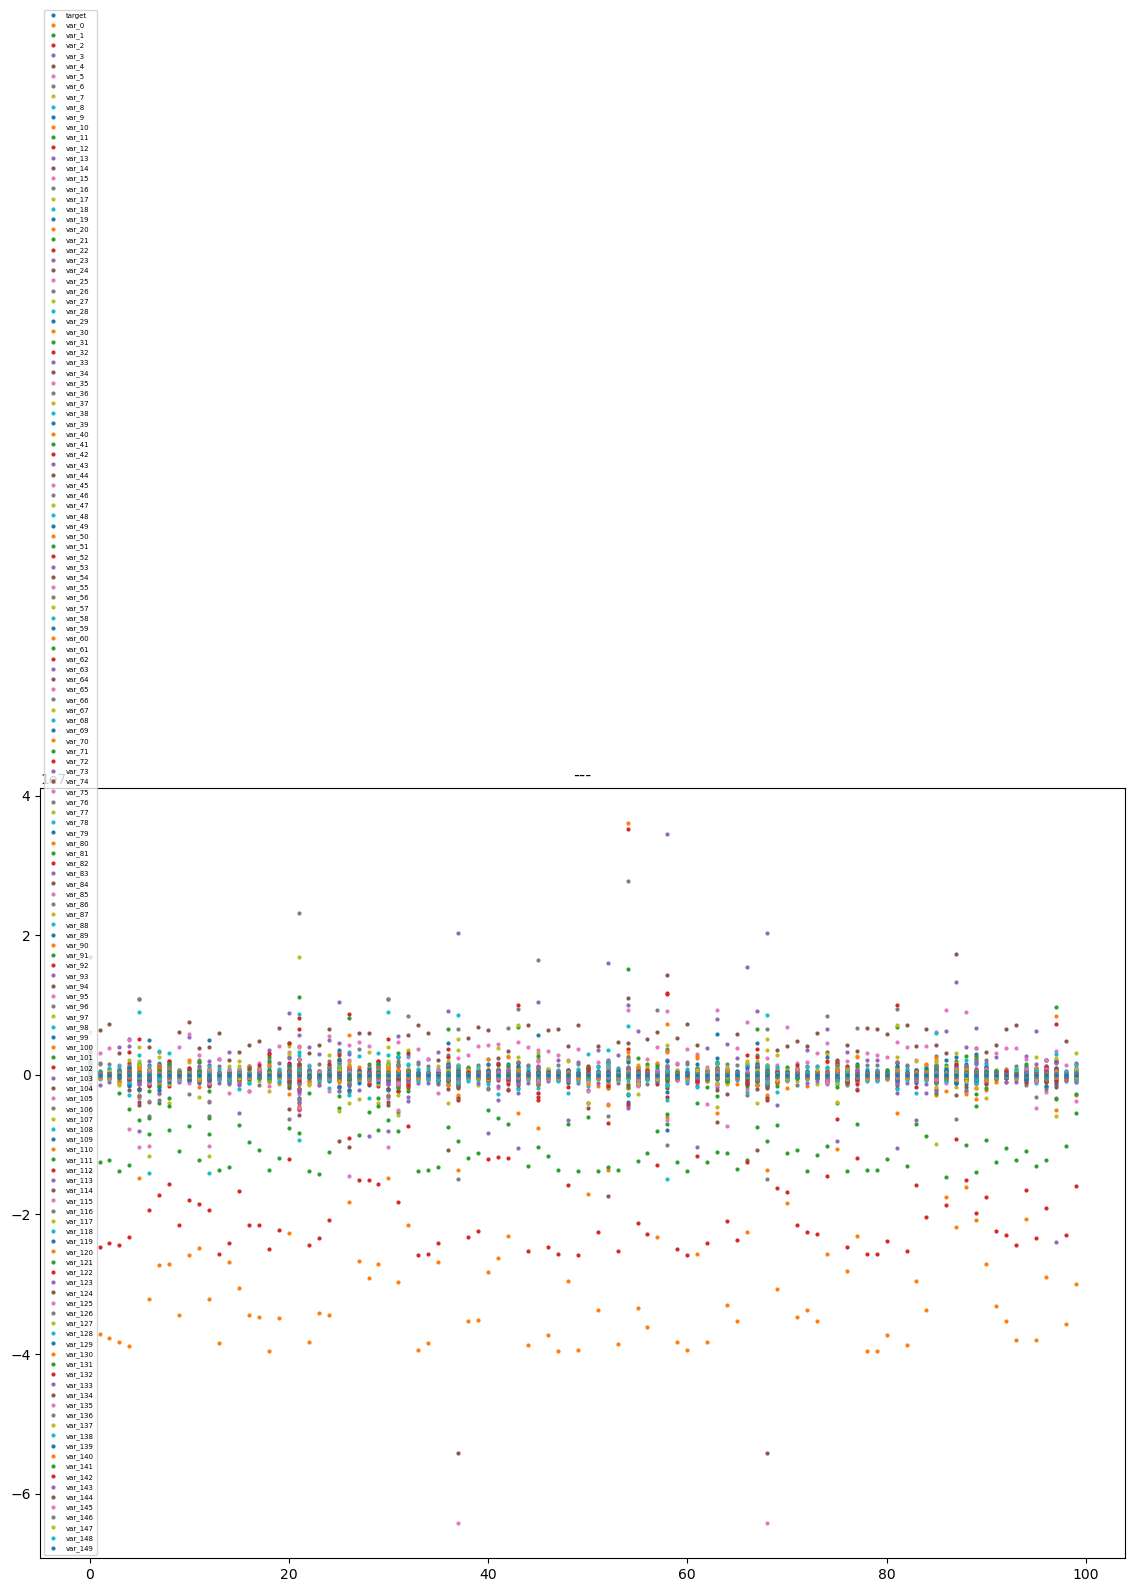

In [7]:
# Вцелом глянем на данные. В данной задаче проблема поиска аутлаеров опущена
fig, ax = plt.subplots(1,1, figsize=(14,10))
df.plot(marker='o', markersize=2, linestyle = 'None', ax=ax)
plt.legend(loc ="lower left", fontsize=5)
plt.title('---'), plt.show();

# ML
Пайплай применения машинного обучения составим на связке PCA + logistic regression

Такой подход наиболее устойчив в обучении, быстр и оставляет за фитчами их интерпретируемость (PCA с линейным ядром). А также наиболее применим для маленьких выборок (как у нас ~ 100)

В качестве главной метрики выберем ROC AUC - отображает истинную и постоянную способность модели к прогнозированию (если я изменю тестовый набор данных)

----------


## PCA and train - test split

In [8]:
# Train - test split
# Задача не на временные ряды - используем сплит c шафлом, при учете дисбаланса классов (stratify)
X_train, X_test, y_train, y_test = train_test_split(df.drop(["target"], axis = 1), df["target"], test_size=0.25, random_state=rand_state, shuffle=True, stratify=df["target"])

In [9]:
print("Соотношение классов в train и test соответственно: ", len(y_train[y_train == 1])/len(y_train), ";", len(y_test[y_test == 1])/len(y_test))

Соотношение классов в train и test соответственно:  0.12 ; 0.12


[0.09622491 0.17298928 0.23106045 0.2808832  0.32849964 0.37131924
 0.41063945 0.44838722 0.48043054 0.5113336  0.54112568 0.56809437
 0.59302311 0.61640633 0.63792655 0.65822886 0.677814   0.69622766
 0.71373977 0.73086201 0.74696236 0.76240195 0.77701763 0.7904246
 0.80288155 0.81515631 0.82665612 0.83772364 0.8486297  0.85904057
 0.86880587 0.87769861 0.88631397 0.89410047 0.90166836 0.9084702
 0.91487853 0.92106029 0.92697702 0.93262389 0.937969   0.94248079
 0.94680296 0.9509746  0.95484219 0.95832592 0.961664   0.96484365
 0.96783379 0.97064895 0.97336142 0.97595249 0.97827073 0.9803122 ]
[0.09622491 0.07676437 0.05807117 0.04982275 0.04761643 0.0428196
 0.03932021 0.03774777 0.03204332 0.03090306 0.02979209 0.02696869
 0.02492873 0.02338322 0.02152022 0.02030232 0.01958514 0.01841366
 0.01751211 0.01712224 0.01610034 0.01543959 0.01461568 0.01340698
 0.01245695 0.01227476 0.01149981 0.01106751 0.01090606 0.01041087
 0.0097653  0.00889274 0.00861536 0.0077865  0.00756789 0.006801

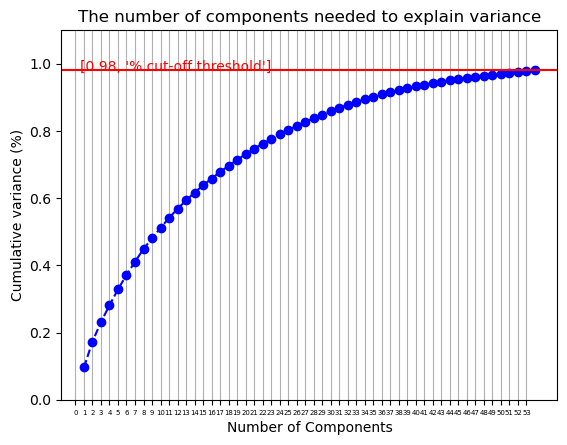

In [10]:
variance = 0.98
scaler = StandardScaler()
scaler.fit(df.drop(["target"], axis = 1))

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(df.drop(["target"], axis = 1))

pca = PCA(n_components = variance, random_state = rand_state)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
xi = np.arange(1, pca.explained_variance_ratio_.shape[0]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.explained_variance_ratio_.shape[0], step=1), fontsize=5) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=variance, color='r', linestyle='-')
plt.text(0.5, variance, s = [variance,'% cut-off threshold'], color = 'red', fontsize=10)
ax.grid(axis='x')
plt.show()

X_train_PCA = pca.transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

## Regression

In [11]:
# Так как есть дисбаланс классов, включим гридсерч по такому параметру, как вес класса w
w = [{0:1,1:1},{0:1,1:2}, 
        {0:1,1:10}, {0:1,1:100}]
#crange = np.logspace(start = 1e-4, stop = 1e4, num = 2) # regularization strength
crange = np.logspace(0.0001, 50.0, num=20)
hyperparam_grid = {"class_weight": w,
                   "solver": ["lbfgs", "liblinear", "newton-cg"],
                   "penalty": ["l1", "l2"],
                   "C": crange,
}

In [12]:
%%time
clf = LogisticRegression(random_state = rand_state, class_weight = 'balanced')
grid = GridSearchCV(clf, hyperparam_grid, scoring="roc_auc", cv=3, n_jobs=-1, refit=True)
grid.fit(X_train_PCA, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7222222222222222 with param: {'C': 1.0002302850208247, 'class_weight': {0: 1, 1: 2}, 'penalty': 'l2', 'solver': 'lbfgs'}
CPU times: total: 781 ms
Wall time: 5.02 s


Accuracy Score: 0.8
Area Under Curve: 0.7424242424242422
Recall score: 0.6666666666666666


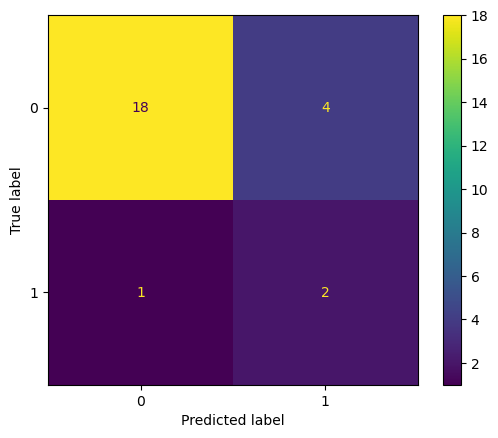

In [13]:
# performance НА тесте, 0 - negative, 1 -  positive
y_test_pred = grid.best_estimator_.predict(X_test_PCA)

print(f'Accuracy Score: {accuracy_score(y_test,y_test_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_test_pred)}')
print(f'Recall score: {recall_score(y_test,y_test_pred)}')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred), display_labels=grid.classes_)
disp.plot()
plt.show()

In [14]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.33      0.67      0.44         3

    accuracy                           0.80        25
   macro avg       0.64      0.74      0.66        25
weighted avg       0.87      0.80      0.83        25



In [15]:
list(y_test), list(y_test_pred)

([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

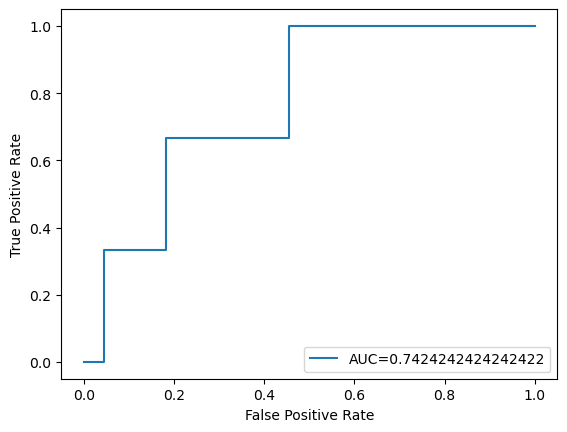

In [16]:
#ROC curve
y_pred_proba = grid.best_estimator_.predict_proba(X_test_PCA)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
# import sklearn
# sklearn.metrics.get_scorer_names()

# Заключение

Невысокие результаты по метрикам могут быть объяснены:

- малым размером выборки 
- возможным временным эффектом (предполагалось, что в задаче нет рекуррентности)
- предполагалось отсутствие аутлаеров, однако можно было бы убрать квантили или на основе алгоритма по ближайшим соседям убрать часть "странных данных"

Что необходимо было бы опробовать для данной задачи и сравнить результаты: 

- "обучить модель на всех фитчах (без PCA, т.к. фитчей не так много)" - опробовано, с PCA лучше
- "бустинг с optuna (catboost или lightgbm)" - если бы выборка была больше (по хорошему, нужно около 10^4)
- можно простое дерево решений, или KNN попробовать
- "поиграть" с трешхолдом для лог регрессии